# ***Star Wars dataset***

> ### **Exploratory Data Analysis con Python**



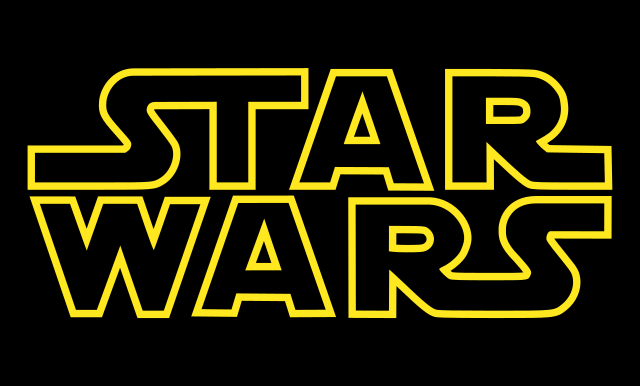

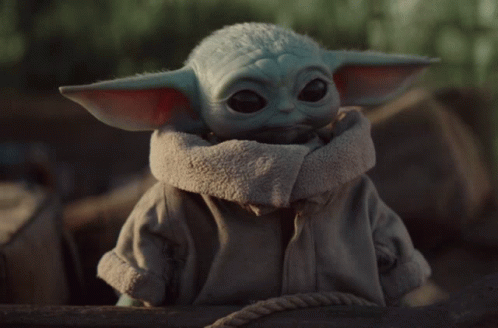

URL: 
https://www.kaggle.com/datasets/ulrikthygepedersen/star-wars-characters

**Columnas**  
name - string  
height - float  
mass - float  
hair_color - string  
skin_color - string  
eye_color - string  
birth_year - float  
sex - string  
gender - string  
homeworld - string  
species - string  
films - string  
vehicles - string  
starships - string    
###--------
14 columnas (originales)   
87 filas

Si alguna gráfica da error, reimprimir la celda de la URL y ya imprimir gráficas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

from scipy import stats
from collections import Counter
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [74]:
url = '/content/drive/MyDrive/Big Data - Madrid/Semana 4 - Python/Semana 4 - compartido/Sesión 3/Práctica/Dani/star_wars_character_dataset.csv'

df = pd.read_csv(url)

## Información básica


5 primeras filas del dataset

In [5]:
df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith, ...","Snowspeeder, Imperial Speeder Bike","X-wing, Imperial shuttle"
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid,"The Empire Strikes Back, Attack of the Clones,...",NaN,NaN
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid,"The Empire Strikes Back, Attack of the Clones,...",NaN,NaN
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith, ...",NaN,TIE Advanced x1
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human,"The Empire Strikes Back, Revenge of the Sith, ...",Imperial Speeder Bike,NaN


Valores no nulos y tipos de datos por columna

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     float64
 3   hair_color  82 non-null     object 
 4   skin_color  87 non-null     object 
 5   eye_color   87 non-null     object 
 6   birth_year  43 non-null     float64
 7   sex         83 non-null     object 
 8   gender      83 non-null     object 
 9   homeworld   77 non-null     object 
 10  species     83 non-null     object 
 11  films       87 non-null     object 
 12  vehicles    11 non-null     object 
 13  starships   20 non-null     object 
dtypes: float64(3), object(11)
memory usage: 9.6+ KB


In [71]:
df = df.astype({'name': 'string', 'hair_color': 'string', 'skin_color': 'string', 'eye_color': 'string', 'sex': 'string', 'gender': 'string', 'homeworld': 'string', 'species': 'string', 'films': 'string', 'vehicles': 'string', 'starships': 'string'})

#df = df.convert_dtypes() -> lo hace solo, pero a veces falla

Imprimimos los tipos de datos otra vez tras castearlos

In [72]:
df.dtypes

name           string
height        float64
mass          float64
hair_color     string
skin_color     string
eye_color      string
birth_year    float64
sex            string
gender         string
homeworld      string
species        string
films          string
vehicles       string
starships      string
dtype: object

Nombre de columnas

In [9]:
df.columns

Index(['name', 'height', 'mass', 'hair_color', 'skin_color', 'eye_color',
       'birth_year', 'sex', 'gender', 'homeworld', 'species', 'films',
       'vehicles', 'starships'],
      dtype='object')

Número de filas y columnas

In [10]:
df.shape

(87, 14)

Suma de valores nulos por columna

In [11]:
 df.isnull().sum(axis = 0)     #axis = 0 -> x columna; 1 -> x fila

name           0
height         6
mass          28
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
films          0
vehicles      76
starships     67
dtype: int64

Descripciones estadísticas

In [12]:
df.describe()

,height,mass,birth_year
count,81.000000,59.000000,43.000000
mean,174.358025,97.311864,87.565116
std,34.770429,169.457163,154.691439
min,66.000000,15.000000,8.000000
25%,167.000000,55.600000,35.000000
50%,180.000000,79.000000,52.000000
75%,191.000000,84.500000,72.000000
max,264.000000,1358.000000,896.000000


## CÁLCULOS

Outliers

In [13]:
#Para la columna 'height'

outlier_altura = df['height'].describe()
outlier_altura

count     81.000000
mean     174.358025
std       34.770429
min       66.000000
25%      167.000000
50%      180.000000
75%      191.000000
max      264.000000
Name: height, dtype: float64

In [14]:
# Accedemos a los valores que nos interesan

min = outlier_altura["min"]
print("El valor mínimo es:", min)

q1 = outlier_altura["25%"]                                         # alternativa: q1 = df["height"].quantile(0.25)
print("\nEl valor del percentil 25 (Q1) es:", q1)

q3 = outlier_altura["75%"]
print("\nEl valor del percentil 75 (Q3) es:", q3)

max  = outlier_altura["max"]
print("\nEl valor máximo es:", max)

El valor mínimo es: 66.0

El valor del percentil 25 (Q1) es: 167.0

El valor del percentil 75 (Q3) es: 191.0

El valor máximo es: 264.0


In [15]:
# Calculos el IQR (Rango Intercuartílico)

iqr = q3 - q1
print("El IQR (Rango Intercuartílico) de la columna 'height' es:", iqr)

El IQR (Rango Intercuartílico) de la columna 'height' es: 24.0


In [16]:
# Calculamos el valor mínimo a partir del cual un valor, si es menor, se considerará 'outlier'
min_outlier = q1 - (1.5*iqr)
print(f'Los valores menores a "{min_outlier}" se considerarán outliers')

# Calculamos el valor máximo a partir del cual un valor, si es mayor, se considerará 'outlier'
max_outlier = q3 + (1.5*iqr)
print(f'\nLos valores mayores a "{max_outlier}" se considerarán outliers')

Los valores menores a "131.0" se considerarán outliers

Los valores mayores a "227.0" se considerarán outliers


In [17]:
# Imprimimos los valores que están por debajo del límite, es decir, que son outliers inferiores

outliers_min_height = df.loc[(df["height"] < min_outlier)].sort_values('height', ascending=True)        #"loc" permite seleccionar elementos mediante condiciones
outliers_min_height

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
18,Yoda,66.0,17.0,white,green,brown,896.0,male,masculine,NaN,Yoda's species,"The Empire Strikes Back, Attack of the Clones,...",NaN,NaN
71,Ratts Tyerell,79.0,15.0,none,"grey, blue",unknown,NaN,male,masculine,Aleen Minor,Aleena,The Phantom Menace,NaN,NaN
28,Wicket Systri Warrick,88.0,20.0,brown,brown,brown,8.0,male,masculine,Endor,Ewok,Return of the Jedi,NaN,NaN
44,Dud Bolt,94.0,45.0,none,"blue, grey",yellow,NaN,male,masculine,Vulpter,Vulptereen,The Phantom Menace,NaN,NaN
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid,"The Empire Strikes Back, Attack of the Clones,...",NaN,NaN
72,R4-P17,96.0,NaN,none,"silver, red","red, blue",NaN,none,feminine,NaN,Droid,"Attack of the Clones, Revenge of the Sith",NaN,NaN
7,R5-D4,97.0,32.0,NaN,"white, red",red,NaN,none,masculine,Tatooine,Droid,A New Hope,NaN,NaN
38,Sebulba,112.0,40.0,none,"grey, red",orange,NaN,male,masculine,Malastare,Dug,The Phantom Menace,NaN,NaN
45,Gasgano,122.0,NaN,none,"white, blue",black,NaN,male,masculine,Troiken,Xexto,The Phantom Menace,NaN,NaN


In [18]:
# Imprimimos los valores que están por debajo del límite, es decir, que son outliers superiores

outliers_max_height = df.loc[(df["height"] > max_outlier)].sort_values('height', ascending=False)
outliers_max_height

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
53,Yarael Poof,264.0,NaN,none,white,yellow,NaN,male,masculine,Quermia,Quermian,The Phantom Menace,NaN,NaN
77,Tarfful,234.0,136.0,brown,brown,blue,NaN,male,masculine,Kashyyyk,Wookiee,Revenge of the Sith,NaN,NaN
68,Lama Su,229.0,88.0,none,grey,black,NaN,male,masculine,Kamino,Kaminoan,Attack of the Clones,NaN,NaN
12,Chewbacca,228.0,112.0,brown,unknown,blue,200.0,male,masculine,Kashyyyk,Wookiee,"The Empire Strikes Back, Revenge of the Sith, ...",AT-ST,"Millennium Falcon, Imperial shuttle"


In [19]:
fig = px.box(df, y="height", title="Box Plot Altura Personajes")
fig.show()

In [20]:
# Para la columna 'mass'

outlier2_masa = df['mass'].describe()
outlier2_masa


# Accedemos a los valores que nos interesan

min = outlier2_masa["min"]
print("El valor mínimo es:", min)

q1 = outlier2_masa["25%"]                                         # alternativa: q1 = df["mass"].quantile(0.25)
print("\nEl valor del percentil 25 (Q1) es:", q1)

q3 = outlier2_masa["75%"]
print("\nEl valor del percentil 75 (Q3) es:", q3)

max  = outlier2_masa["max"]
print("\nEl valor máximo es:", max)


# Calculos el IQR (Rango Intercuartílico)

iqr = q3 - q1
print("\n\nEl IQR (Rango Intercuartílico) de la columna 'mass' es:", iqr)


# Calculamos el valor mínimo a partir del cual un valor, si es menor, se considerará 'outlier'
min_outlier2 = q1 - (1.5*iqr)
print(f'\n\nLos valores menores a "{round(min_outlier2, 2)}" se considerarán outliers')

# Calculamos el valor máximo a partir del cual un valor, si es mayor, se considerará 'outlier'
max_outlier2 = q3 + (1.5*iqr)
print(f'\nLos valores mayores a "{max_outlier2}" se considerarán outliers')

El valor mínimo es: 15.0

El valor del percentil 25 (Q1) es: 55.6

El valor del percentil 75 (Q3) es: 84.5

El valor máximo es: 1358.0


El IQR (Rango Intercuartílico) de la columna 'mass' es: 28.9


Los valores menores a "12.25" se considerarán outliers

Los valores mayores a "127.85" se considerarán outliers


In [21]:
#Imprimimos los valores que están por debajo del límite, es decir, que son outliers inferiores (no hay)

outliers2_min_mass = df.loc[(df["mass"] < min_outlier2)].sort_values('mass', ascending=True)
outliers2_min_mass

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships


In [22]:
#Imprimimos los valores que están por debajo del límite, es decir, que son outliers superiores

outliers2_max_mass = df.loc[(df["mass"] > max_outlier2)].sort_values('mass', ascending=False)
outliers2_max_mass

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
15,Jabba Desilijic Tiure,175.0,1358.0,NaN,"green-tan, brown",orange,600.0,hermaphroditic,masculine,Nal Hutta,Hutt,"The Phantom Menace, Return of the Jedi, A New ...",NaN,NaN
76,Grievous,216.0,159.0,none,"brown, white","green, yellow",NaN,male,masculine,Kalee,Kaleesh,Revenge of the Sith,Tsmeu-6 personal wheel bike,Belbullab-22 starfighter
21,IG-88,200.0,140.0,none,metal,red,15.0,none,masculine,NaN,Droid,The Empire Strikes Back,NaN,NaN
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith, ...",NaN,TIE Advanced x1
77,Tarfful,234.0,136.0,brown,brown,blue,NaN,male,masculine,Kashyyyk,Wookiee,Revenge of the Sith,NaN,NaN


In [23]:
fig = px.box(df, y="mass", title="Box Plot Masa Personajes")
fig.show()

In [24]:
fig = px.box(df, y=df[df['mass'] < 1000]['mass'], title="Box Plot Masa Personajes sin Jabba")
fig.show()


Imprimir una fila concreta y sus valores según el índice numérico (con 'loc' se utilizaba el nombre o etiqueta)

In [25]:
df.iloc[0] # Primera fila    (o [0, :]) porque la estructura es iloc[fila_a:fila_b , columna_a:columna_b]

#df.iloc[0:5]  -> Primeras cinco filas

name                                             Luke Skywalker
height                                                    172.0
mass                                                       77.0
hair_color                                                blond
skin_color                                                 fair
eye_color                                                  blue
birth_year                                                 19.0
sex                                                        male
gender                                                masculine
homeworld                                              Tatooine
species                                                   Human
films         The Empire Strikes Back, Revenge of the Sith, ...
vehicles                     Snowspeeder, Imperial Speeder Bike
starships                              X-wing, Imperial shuttle
Name: 0, dtype: object

Para imprimir una columna según el índice y no el nombre

In [26]:
df.iloc[:, 0] # Primera columna (name)

#df.iloc[:, 0:5]  -> Primeras cinco columnas

0     Luke Skywalker
1              C-3PO
2              R2-D2
3        Darth Vader
4        Leia Organa
           ...      
82               Rey
83       Poe Dameron
84               BB8
85    Captain Phasma
86     Padmé Amidala
Name: name, Length: 87, dtype: object

Elementos y sus repeticiones de la columna indicada

In [27]:
df['gender'].value_counts()

masculine    66
feminine     17
Name: gender, dtype: int64

Si quieres datos normalizados sobre 1 (para ver porcentualmente -> *100)

In [28]:
df['gender'].value_counts(normalize=True)

masculine    0.795181
feminine     0.204819
Name: gender, dtype: float64

Filtrar por una columna teniendo en cuenta que se repita el valor más de una vez

In [29]:
especies = df['species'].value_counts().sort_values(ascending=False)

df_filtrado = df[df['species'].isin(especies[especies > 1].index)]

registros_por_especie = df_filtrado['species'].value_counts()
registros_por_especie

#graficado

Human       35
Droid        6
Gungan       3
Wookiee      2
Zabrak       2
Twi'lek      2
Mirialan     2
Kaminoan     2
Name: species, dtype: int64

In [30]:
planeta = df['homeworld'].value_counts().sort_values(ascending=False)

df_filtrado = df[df['homeworld'].isin(planeta[planeta > 1].index)]

registros_por_planeta = df_filtrado['homeworld'].value_counts()
registros_por_planeta

#graficado

Naboo        11
Tatooine     10
Alderaan      3
Kamino        3
Coruscant     3
Kashyyyk      2
Corellia      2
Ryloth        2
Mirial        2
Name: homeworld, dtype: int64

Para buscar una palabra filtrando por una columna en concreto



In [31]:
df.loc[df['species'] == 'Droid']

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid,"The Empire Strikes Back, Attack of the Clones,...",NaN,NaN
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid,"The Empire Strikes Back, Attack of the Clones,...",NaN,NaN
7,R5-D4,97.0,32.0,NaN,"white, red",red,NaN,none,masculine,Tatooine,Droid,A New Hope,NaN,NaN
21,IG-88,200.0,140.0,none,metal,red,15.0,none,masculine,NaN,Droid,The Empire Strikes Back,NaN,NaN
72,R4-P17,96.0,NaN,none,"silver, red","red, blue",NaN,none,feminine,NaN,Droid,"Attack of the Clones, Revenge of the Sith",NaN,NaN
84,BB8,NaN,NaN,none,none,black,NaN,none,masculine,NaN,Droid,The Force Awakens,NaN,NaN


Establecemos dos condiciones y nos devuelve el contenido de dichas filas

In [32]:
df.loc[(df['homeworld'] == 'Tatooine') & (df['gender'] == 'masculine')]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith, ...","Snowspeeder, Imperial Speeder Bike","X-wing, Imperial shuttle"
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid,"The Empire Strikes Back, Attack of the Clones,...",NaN,NaN
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith, ...",NaN,TIE Advanced x1
5,Owen Lars,178.0,120.0,"brown, grey",light,blue,52.0,male,masculine,Tatooine,Human,"Attack of the Clones, Revenge of the Sith, A N...",NaN,NaN
7,R5-D4,97.0,32.0,NaN,"white, red",red,NaN,none,masculine,Tatooine,Droid,A New Hope,NaN,NaN
8,Biggs Darklighter,183.0,84.0,black,light,brown,24.0,male,masculine,Tatooine,Human,A New Hope,NaN,X-wing
10,Anakin Skywalker,188.0,84.0,blond,fair,blue,41.9,male,masculine,Tatooine,Human,"Attack of the Clones, The Phantom Menace, Reve...","Zephyr-G swoop bike, XJ-6 airspeeder","Trade Federation cruiser, Jedi Interceptor, Na..."
58,Cliegg Lars,183.0,NaN,brown,fair,blue,82.0,male,masculine,Tatooine,Human,Attack of the Clones,NaN,NaN


Crear una nueva columna dependiendo de tu función

In [33]:
def crear_codigo(name):
    name = name['name']
    name = name.upper()
    name = name[0:4]
    return name

df['Codigo'] = df.apply(crear_codigo, axis = 1)

In [34]:
def categoria(columna):
    altura = columna['height']
    masa = columna['mass']
    if altura > 1.75:
        if masa > 75:
            return 'Big Character'
        else:
            return 'Normal Character'
        
    return 'Small Character'

df['Size'] = df.apply(categoria, axis = 1)

In [35]:
df.sample(5)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships,Codigo,Size
42,Bib Fortuna,180.0,NaN,none,pale,pink,NaN,male,masculine,Ryloth,Twi'lek,Return of the Jedi,NaN,NaN,BIB,Normal Character
49,Kit Fisto,196.0,87.0,none,green,black,NaN,male,masculine,Glee Anselm,Nautolan,"Attack of the Clones, The Phantom Menace, Reve...",NaN,NaN,KIT,Big Character
67,Dexter Jettster,198.0,102.0,none,brown,yellow,NaN,male,masculine,Ojom,Besalisk,Attack of the Clones,NaN,NaN,DEXT,Big Character
19,Palpatine,170.0,75.0,grey,pale,yellow,82.0,male,masculine,Naboo,Human,"The Empire Strikes Back, Attack of the Clones,...",NaN,NaN,PALP,Normal Character
45,Gasgano,122.0,NaN,none,"white, blue",black,NaN,male,masculine,Troiken,Xexto,The Phantom Menace,NaN,NaN,GASG,Normal Character


Agrupo por especies y sumo cuántas muestras (repeticiones) hay en cada una // ordeno decrecientemente

In [36]:
grupo2 = df.groupby(['species']).size().sort_values(ascending=False)   #es lo mismo que: df['species'].value_counts()
grupo2

species
Human             35
Droid              6
Gungan             3
Twi'lek            2
Mirialan           2
Kaminoan           2
Zabrak             2
Wookiee            2
Vulptereen         1
Trandoshan         1
Pau'an             1
Toydarian          1
Toong              1
Togruta            1
Xexto              1
Tholothian         1
Yoda's species     1
Sullustan          1
Skakoan            1
Rodian             1
Quermian           1
Aleena             1
Neimodian          1
Nautolan           1
Besalisk           1
Mon Calamari       1
Kel Dor            1
Kaleesh            1
Iktotchi           1
Hutt               1
Geonosian          1
Ewok               1
Dug                1
Clawdite           1
Chagrian           1
Cerean             1
Muun               1
dtype: int64

Agrupo por especies y hace una suma total de los tipos de datos int/float (no cuenta las repeticiones)

In [37]:
grupo1 = df.groupby(['species']).sum()
grupo1

,height,mass,birth_year
species,,,
Aleena,79.0,15.0,0.0
Besalisk,198.0,102.0,0.0
Cerean,198.0,82.0,92.0
Chagrian,196.0,0.0,0.0
Clawdite,168.0,55.0,0.0
Droid,656.0,279.0,160.0
Dug,112.0,40.0,0.0
Ewok,88.0,20.0,8.0
Geonosian,183.0,80.0,0.0


Contar la palabra individual más repetida de la columna 'films' (útil para columnas de strings)

In [38]:
text = " ".join(df['films'].astype(str).tolist())
words = text.split()

word_counts = Counter(words)
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
word_counts_df.index.name = 'word'
word_counts_df = word_counts_df.reset_index()
word_counts_df = word_counts_df.sort_values('count', ascending=False)

print(word_counts_df.head(10))


       word  count
5        of     94
6       the     94
0       The     61
15   Attack     40
4   Revenge     34
17  Phantom     34
16  Clones,     27
20     Sith     21
8    Return     20
10        A     18


Análisis de distribución normal

Cálculo de skewness y kurtosis (para ver si existe distribución normal)

In [40]:
print("Skewness de height:", round(df['height'].skew(), 4))
print("Kurtosis de height:", round(df['height'].kurt(), 4))
print()
print("Skewness de mass:", round(df['mass'].skew(), 4))
print("Kurtosis de mass:", round(df['mass'].kurt(), 4))

print('\nSi eliminamos el valor extraordinariamente atípico de Jabba:')
print("Skewness de mass sin Jabba:", round(df[df['mass'] < 1000]['mass'].skew(), 4))
print("Kurtosis de mass sin Jabba:", round(df[df['mass'] < 1000]['mass'].kurt(), 4))

print('\nEn general, se puede decir que una distribución es normal si la asimetría y la kurtosis están cerca de cero.')

Skewness de height: -1.0646
Kurtosis de height: 2.097

Skewness de mass: 7.3366
Kurtosis de mass: 55.418

Si eliminamos el valor extraordinariamente atípico de Jabba:
Skewness de mass sin Jabba: 0.4062
Kurtosis de mass sin Jabba: 0.8409

En general, se puede decir que una distribución es normal si la asimetría y la kurtosis están cerca de cero.


Correlación

In [41]:
# Para ver la correlación entre las columnas numéricas (aquí no nos dice nada, porque solo hay 3 columnas así y no relacionadas)

df_num = df.select_dtypes(include = ['float64', 'int64'])

df_num_corr = df_num.corr()['height'][:-1]
features_list = df_num_corr[abs(df_num_corr) > 0.001].sort_values(ascending = False)
print(f'Hay {len(features_list)} valores correlacionados con height:\n{features_list}')

Hay 2 valores correlacionados con height:
height    1.000000
mass      0.133884
Name: height, dtype: float64


In [42]:
#más sencillo

correlacion = df['height'].corr(df['mass'])
print('Correlación:', round(correlacion, 4))

correlacion_jabba = df['height'].corr(df[df['mass'] < 1000]['mass'])
print('Correlación sin masa Jabba:', round(correlacion_jabba, 4))

Correlación: 0.1339
Correlación sin masa Jabba: 0.7613


In [43]:
correlacion_spearman = df['height'].corr(df['mass'], method='spearman')
print(correlacion_spearman)

print('\nLa correlación de Spearman indica la fuerza y dirección de la relación entre dos variables clasificadas, independientemente \nde la forma exacta de la relación entre ellas')

0.7516794420600312

La correlación de Spearman indica la fuerza y dirección de la relación entre dos variables clasificadas, independientemente 
de la forma exacta de la relación entre ellas


## **GRÁFICAS**

Matplotlib

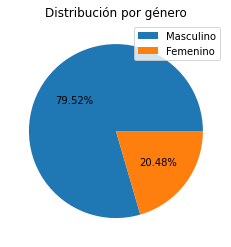

In [44]:
distribucion_genero = df['gender'].value_counts()

plt.pie(distribucion_genero, autopct='%.2f%%')       #igual que:   plt.pie(df.groupby(['gender']).size(), autopct='%.2f%%')
plt.title('Distribución por género')
plt.legend(['Masculino', 'Femenino'])
plt.show()

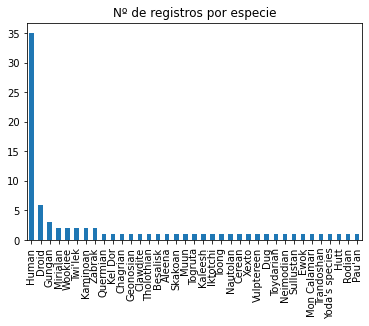

In [45]:
df['species'].value_counts().plot.bar()

plt.title('Nº de registros por especie')
plt.show()

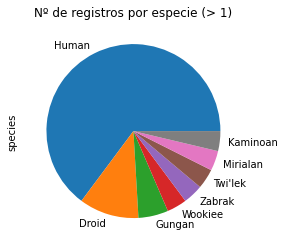

In [46]:
#especies = df['species'].value_counts().sort_values(ascending=False)           #código anterior
#df_filtrado = df[df['species'].isin(especies[especies > 1].index)]
#registros_por_especie = df_filtrado['species'].value_counts()


registros_por_especie.plot(kind='pie')

plt.title('Nº de registros por especie (> 1)')
plt.show()

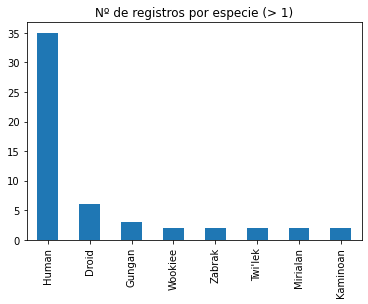

In [47]:
registros_por_especie.plot(kind='bar')

plt.title('Nº de registros por especie (> 1)')
plt.show()

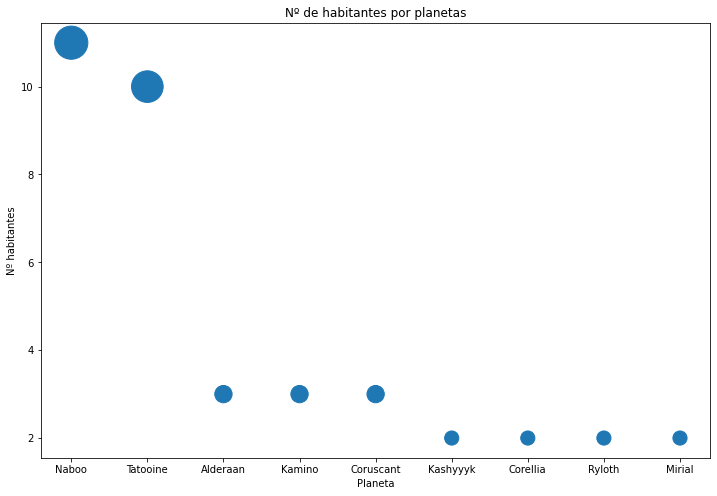

In [75]:
planeta = df['homeworld'].value_counts().sort_values(ascending=False)
df_filtrado = df[df['homeworld'].isin(planeta[planeta > 1].index)]
registros_por_planeta = df_filtrado['homeworld'].value_counts()

df_bubble = pd.DataFrame({'homeworld': registros_por_planeta.index, 'count': registros_por_planeta.values})

plt.figure(figsize=(12,8))

plt.scatter(df_bubble['homeworld'], df_bubble['count'], s=df_bubble['count']*100)

plt.xlabel('Planeta')
plt.ylabel('Nº habitantes')

plt.title('Nº de habitantes por planetas')
plt.show()

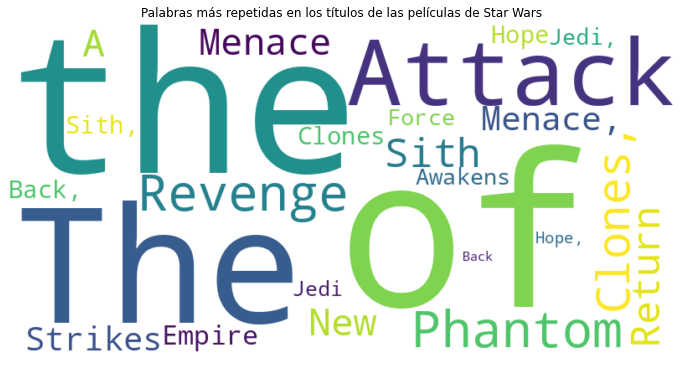

In [49]:
word_dict = dict(zip(word_counts_df['word'], word_counts_df['count']))

# Crear la nube de puntos
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_dict)

# Mostrar la nube de puntos
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más repetidas en los títulos de las películas de Star Wars')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



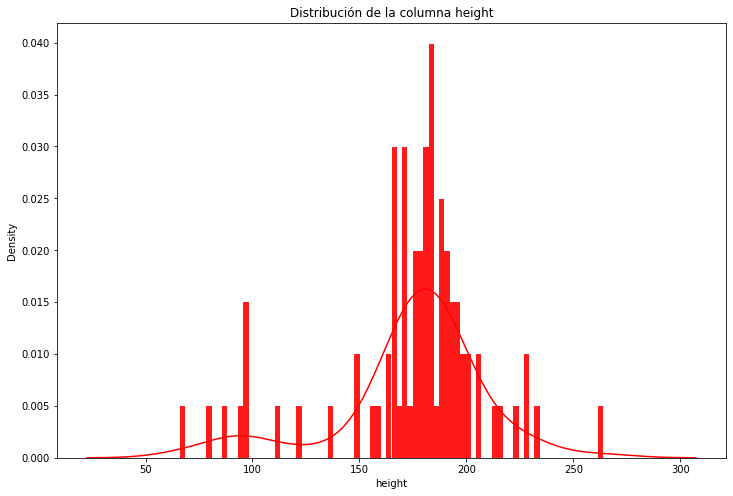

In [50]:
plt.figure(figsize = (12,8))
sns.distplot(df['height'], color = 'r', bins = 80, hist_kws = {'alpha': 0.9})

plt.title('Distribución de la columna height')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



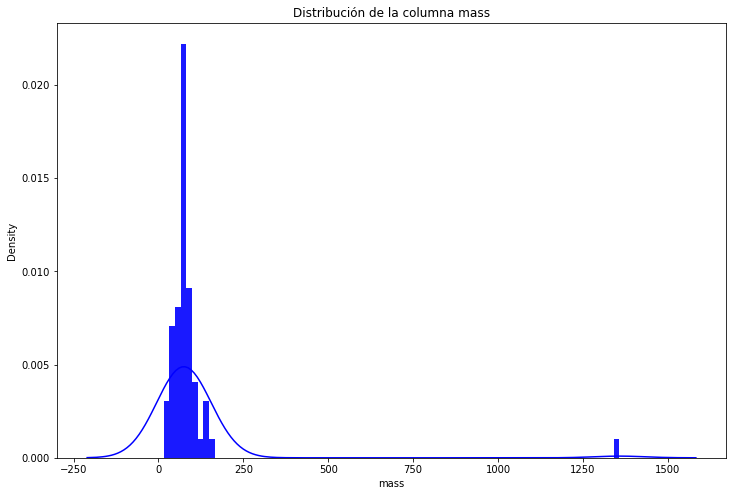

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



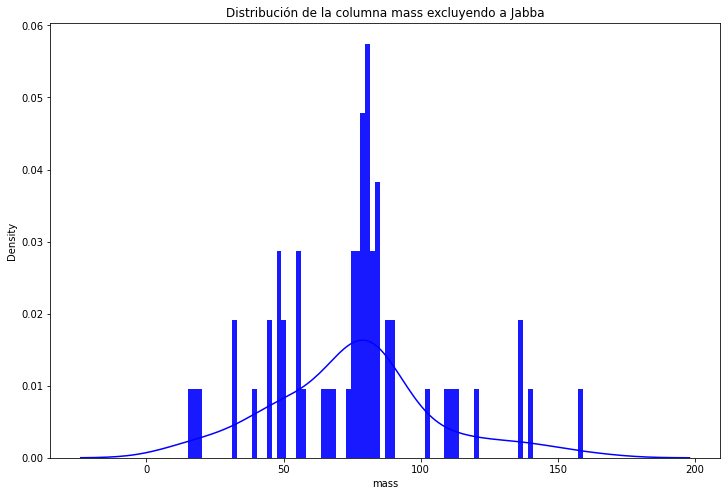

In [51]:
plt.figure(figsize = (12,8))
sns.distplot(df['mass'], color = 'b', bins = 80, hist_kws = {'alpha': 0.9})
plt.title('Distribución de la columna mass')
plt.show()


plt.figure(figsize = (12,8))
sns.distplot(df[df['mass'] < 1000]['mass'], color = 'b', bins = 80, hist_kws = {'alpha': 0.9})
plt.title('Distribución de la columna mass excluyendo a Jabba')
plt.show()

esta función ayuda a evaluar si una muestra sigue una distribución normal esperada //
Cuanto más recta, más distribución normal


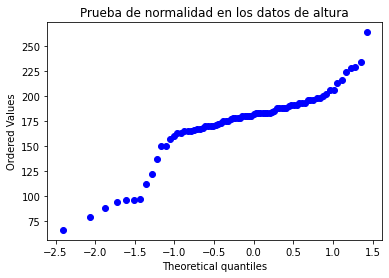

In [52]:
print('esta función ayuda a evaluar si una muestra sigue una distribución normal esperada //\nCuanto más recta, más distribución normal')

distr = stats.probplot(df['height'], plot = plt)
plt.title("Prueba de normalidad en los datos de altura")
plt.show()

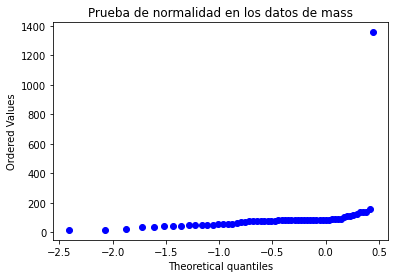

In [53]:
distr = stats.probplot(df['mass'], plot = plt)
plt.title("Prueba de normalidad en los datos de mass")
plt.show()

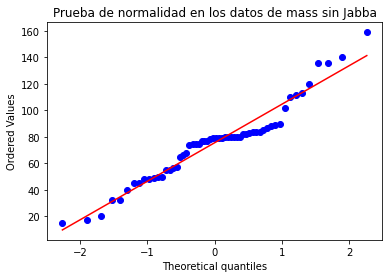

In [54]:
distr = stats.probplot(df[df['mass'] < 1000]['mass'], plot = plt)
plt.title("Prueba de normalidad en los datos de mass sin Jabba")
plt.show()

array([[<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'mass'}>],
       [<AxesSubplot:title={'center':'birth_year'}>, <AxesSubplot:>]],
      dtype=object)

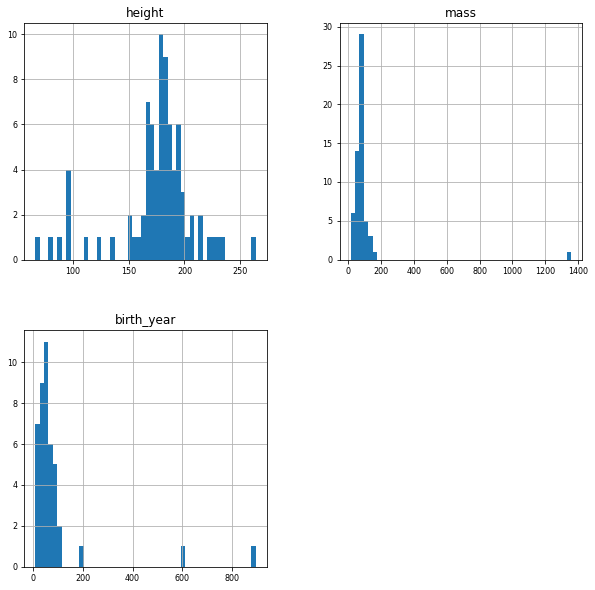

In [55]:
# Para sacar la distribución del resto de columnas que contengan datos numéricos (aquí solo hay 3):

df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize = (10, 10), bins = 50, xlabelsize = 8, ylabelsize = 8)

<AxesSubplot:>

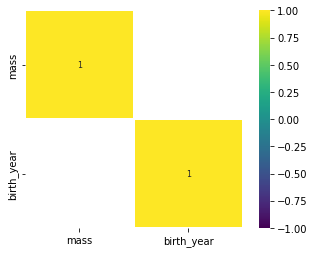

In [56]:
# Gráfico de la correlación (aquí no nos dice nada, porque solo hay 3 columnas así y no relacionadas)

corr = df_num.drop('height', axis = 1).corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap = 'viridis', vmax = 1.0, vmin = -1.0, linewidths = 0.1,
            annot = True, annot_kws = {'size': 8}, square = True)

Plotly express

In [57]:
fig = px.scatter(df, x="species", y="height", color='mass', title="Gráfico de dispersión de la altura de los usuarios por especie y teniendo en cuenta la masa")

fig.show()

In [58]:
fig = px.scatter_3d(df, x='sex', y='hair_color', z='eye_color', color='name', title ='Relación entre el sexo, el color de pelo, de ojos y el nombre')
fig.show()

In [59]:
#Creo una copia y relleno los valores nulos con 0 para poder hacer gráficos que no permitan coger valores NaN

df_copia = df.copy()
df_copia = df_copia.fillna(0)

In [60]:
#Ignoro el valor 0 de género / cojo las alturas mayores a 0 / grafico

df_filtered = df_copia[(df_copia['gender'] != 0) & (df_copia['height'] > 0)]

fig = px.violin(df_filtered, y="height", color="gender", violinmode='overlay', points="all", 
                title ='Diagrama de violín de la altura respecto al sexo', hover_data=df_copia.columns)

fig.show()

In [61]:
fig = px.density_heatmap(df, x="eye_color", y="sex", title='Mapa de calor del sexo respecto al color de ojos')
fig.show()

In [62]:
fig = px.density_contour(df, x="eye_color", y="height", title='Contorno de densidad de color de ojos y altura')
fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.show()

##CONCLUSIONES



*   Las columnas 'vehicles', 'starships' y 'birth_year' han sido ignoradas por contener muchos valores nulos y no aportar información al dataset.
*   Outliers:  
    'Height': la mayoría de valores están concentrados, a excepción de con los pesos más bajos, que hay bastantes outliers por la variedad de especies y el gran numero de personajes 'enanos'.  
    'Mass': valores muy concentrados, ningun outlier mínimo. Jabba distorsiona los resultados, pues su peso de 1358kg es 1200kg superior al 2º mayor, por lo que decidimos hacer gráficas comparativas con y sin él.

*   80% personajes son masculinos
*   42% humanos, el resto de porcentajes son muy pequeños, lo que es muestra de la diversidad de especies del universo Star Wars.
*   Los planetas mas represantados son Naboo y Tatooine, hogar de los Skywalker, eje central de la saga.
*   Distribución:  
	'Height': no sigue distribución normal, pero tampoco está muy alejada de ella, según los cálculos y gráfica mostrados.  
	'Mass': si tenemos en cuenta a Jabba, está muy lejos de acercarse a una distribucion normal; pero sin él obtenemos valores muy cercanos a lo que se considera una distribución normal, y así se pone de manifiesto tanto en el cálculo de la kurtosis como de la asimetría y en la representación gráfica de la normalidad.






